# Synopsis

We attempt a Naive Bayes classifier for the sentiment of a corpus of wine reviews. We use the score of the review as our sentiment value, assuming that a bad review will have negative sentiment and a good review will have positive sentiment.

#  Configuration

In [1]:
src_file = 'winereviews.csv'

# Set Hyperparameters
params = dict(
    qntile_B = .1,
    qntile_A = .9,
    n_sets = 4,
    smooth_alpha = 1,
    binary_counts = True
)

# Libraries

In [2]:
import pandas as pd
from numpy.random import randint
# import sys; sys.path.append(local_lib)
# import textman.textman as tx
from textman import create_tokens_and_vocab

In [3]:
# import pandas as pd
# import nltk
# from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer
# import numpy as np
# import sqlite3

# def import_source(src_file, start_line=None, end_line=None, col_name='line', id_name='line_id', strip=True):
#     print('src_file', src_file)
#     df = pd.DataFrame({col_name:open(src_file,'r').readlines()})
#     if not start_line:
#         start_line = 0
#     if not end_line:
#         end_line = len(df.index)
#     df = df.loc[start_line:end_line]
#     df.index.name = id_name
#     if strip:
#         df[col_name] = df[col_name].str.strip()
#     return df
 
# def group_by_milestone(df, div_name, div_pat, src_idx, src_col, tmp_col='div_idx', id_suffix='_id'):
#     df[div_name] = df[src_col].str.match(div_pat)
#     df2 = df.loc[df[div_name], src_col].copy().reset_index(drop=True).to_frame()\
#         .rename(columns={src_col:div_name})
#     df2.index.name = div_name + id_suffix
#     df[tmp_col] = None
#     df[tmp_col] = df[df[div_name]].apply(lambda x: x.index)
#     df[tmp_col] = df[tmp_col].ffill()
#     df[tmp_col] = df[tmp_col].astype('int')
#     df2[div_name] = df.groupby(tmp_col)[src_col].apply(lambda x: '\n'.join(x[:]))\
#         .to_frame().reset_index(drop=True)
#     df2.index.name = div_name + id_suffix
#     return df2
 
# def split_by_delimitter(df, div_name=None, div_pat=None, src_col=None, join_pat='\n', id_suffix='_id'):
#     df2 = df[src_col].str.split(div_pat, expand=True).stack().to_frame()\
#         .rename(columns={0:div_name}).copy()
#     df2.index.names = df.index.names + [div_name + id_suffix]
#     df2[div_name] = df2[div_name].str.replace(join_pat, ' ')
#     df2 = df2[~df2[div_name].str.match(r'^\s*$')]
#     return df2
 
# def gather_tokens(df, level=0, col='token', glue=' ', collapse=False):
#     idx = df.index.names[:level+1]
#     df2 = df.groupby(idx)[col].apply(lambda x: glue.join(x))
#     return df2
 
# def normalize_tokens(df, token_col='token'):
#     df['term_str'] = df[token_col].str.lower().str.strip()
#     return df
 
# def add_pos_to_tokens(tokens, idx=['chap_id','para_id','sent_id'], token_col='token'):
#     df = tokens.groupby(idx).token.apply(lambda x: nltk.pos_tag(x.tolist()))\
#         .apply(pd.Series).stack()\
#         .to_frame().reset_index()\
#         .rename(columns={'level_{}'.format(len(idx)):'token_id', 0:'pos'})\
#         .set_index(idx + ['token_id'])
#     tokens['pos'] = df.pos.apply(lambda x: x[1])
#     return tokens
 
# def create_vocab(df, col='term_str'):
#     terms = df[col].value_counts()\
#         .to_frame().reset_index()\
#         .rename(columns={'index':'term',col:'n'})\
#         .sort_values('term').reset_index(drop=True)
#     terms.index.name = 'term_id'
#     terms['f'] = terms.n.div(terms.n.sum())
#     return terms
 
# def add_stems_to_vocab(vocab):
#     ps = PorterStemmer()
#     vocab['stem'] = vocab['term'].apply(lambda x: ps.stem(x))
#     return vocab
 
# def link_tokens_to_vocab(tokens, vocab, drop=False):
#     tokens['term_id'] = tokens['term_str'].map(vocab.reset_index()\
#           .set_index('term').term_id)
#     if drop:
#         del(tokens['term_str'])
#     return tokens
 
# # Todo: Codify these assumptions in config
# def identify_stopwords(vocab):
#     sw = set(stopwords.words('english'))
#     vocab['sw'] = vocab.apply(lambda x:
#         x.term in sw
#         or len(x.term) <= 2
#         or not x.term.isalpha()
#         or x.n < 3,
#         axis=1)
#     vocab['go'] = ~vocab.sw
#     return vocab
 
# def remove_stopwords(df, vocab, term_id_col='term_id'):
#     df = df[df[term_id_col].isin(vocab[vocab.go].index.values)].copy()
#     return df
 
# def create_doc_table(tokens, index=['chap_id', 'para_id']):
#     doc = tokens.groupby(index).term_id.count()\
#         .to_frame().rename(columns={'term_id':'n'})
#     return doc
 
# def create_bow(tokens, idx, index_name='doc_id'):
#     col = idx[-1]
#     bow = tokens.groupby(idx)[col].count()\
#         .to_frame().rename(columns={col:'n'})
#     if index_name:
#         bow.index.name = index_name
#     return bow
 
# def create_dtm(bow, fill_val=0):
#     dtm = bow.unstack().fillna(fill_val)
#     dtm.columns = dtm.columns.droplevel(0)
#     return dtm
 
# def compute_term_freq(dtm, vocab):
#     dtm_tf = dtm.apply(lambda x: x / x.sum(), 1)
#     vocab['tf_sum'] = dtm_tf.sum()
#     return dtm, vocab
 
# def compute_inv_doc_freq(dtm, vocab):
#     N = len(dtm.index)
#     dtm_idf = dtm.apply(lambda x: N / x[x > 0].count())
#     vocab['idf'] = dtm_idf
#     return dtm_idf, vocab
 
# def compute_tfidf(dtm, vocab, doc, bow, sw=False):
#     N = len(dtm.index)
#     dtm_tfidf = dtm.apply(lambda row: row / row.sum(), 1)\
#         .apply(lambda col: col * np.log2(N/col[col > 0].count()))
#     vocab['tfidf_sum'] = dtm_tfidf.sum()
#     doc['tfidf_sum'] = dtm_tfidf.sum(1)
#     bow['tfidf'] = dtm_tfidf.stack().to_frame().rename(columns={0:'tfidf'})
#     return dtm_tfidf, vocab, doc, bow
 
# def get_term_id(vocab, term):
#     term_id = vocab[vocab.term==term].index[0]
#     return term_id
 
# def get_term(vocab, term_id):
#     term = vocab.loc[term_id].term
#     return term
 
# def create_tokens_and_vocab(paras, idx=['chap_id','para_id','sent_id'], src_col='para', drop=False):
#     cfg = dict(
#         sent = dict(
#             div_name = 'sent',
#             div_pat = r'(?:[":;.?!\(\)]|--)',
#             src_col = src_col,
#             join_pat = ' '
#         ),
#         token = dict(
#            div_name = 'token',
#            div_pat = r'\W+',
#            src_col = 'sent',
#            join_pat = ' '
#         )
#     )
#     sents = split_by_delimitter(paras, **cfg['sent'])
#     tokens = split_by_delimitter(sents, **cfg['token'])
#     tokens = normalize_tokens(tokens)
# #    tokens = add_pos_to_tokens(tokens, idx=idx)
#     vocab = create_vocab(tokens)
#     vocab = add_stems_to_vocab(vocab)
#     vocab = identify_stopwords(vocab)
#     tokens = link_tokens_to_vocab(tokens, vocab, drop=drop)
#     tokens = remove_stopwords(tokens, vocab)
#     return tokens, vocab
 
# def add_doc_len_features(df, str_col, prefix='doc_'):
#     len = prefix + 'len'
#     df[len] = df[str_col].str.len()
#     df[prefix + 'z'] = (df[len] - df[len].mean()).div(df[len].str())
#     df[prefix + 's'] = (df[len] / df[len].max()).multiply(100).round().astype('int')
#     df[prefix + 'p'] = df[len] / df[len].sum()
#     df[prefix + 'h'] = df[prefix+'p'].multiply(np.log2(df[prefix+'p'])) * -1
#     return df
 
# def get_pca(df, k=2):
#     from sklearn.decomposition import PCA
#     pca = PCA(k)
#     X = pd.DataFrame(pca.fit_transform(df))
#     X.index = df.index.tolist()
#     return X
 
# def put_to_db(db, df, table_name, index=True, if_exists='replace'):
#     r = df.to_sql(table_name, db, index=index, if_exists=if_exists)
#     return r
 
# def get_from_db(db, table_name):
#     df = pd.read_sql("SELECT * FROM {}".format(table_name), db)
#     return df
 
# def get_table(table, db_file, fields='*', index_col=None):
#     if type(fields) is list:
#         fields = ','.join(fields)
#     with sqlite3.connect(db_file) as db:
#         return pd.read_sql("select {} from {}".format(fields, table), db, index_col=index_col)
 
# def get_sql(sql, db_file, params=None):
#     with sqlite3.connect(db_file) as db:
#         return pd.read_sql(sql, db, params)


# Pragmas

In [4]:
%matplotlib inline

In [5]:
# nltk.download('stopwords')

# Process

## PREPROCESSING

### Import raw review data

In [6]:
try:
    docs = pd.read_csv('winereviews.csv', index_col='doc_id')
except FileNotFoundError as e:
    print(e)

In [7]:
docs.head()

,doc_content,points
doc_id,,
0,"Aromas include tropical fruit, broom, brimston...",87
1,"This is ripe and fruity, a wine that is smooth...",87
2,"Tart and snappy, the flavors of lime flesh and...",87
3,"Pineapple rind, lemon pith and orange blossom ...",87
4,"Much like the regular bottling from 2012, this...",87


### Clip DOC table by quantile

We only want reviews that are very good or very bad.

In [8]:
bound_A = int(docs.points.quantile(params['qntile_A']))
bound_B = int(docs.points.quantile(params['qntile_B']))
docs = docs[(docs.points <= bound_B) | (docs.points >= bound_A)].copy()

In [9]:
print('A:', bound_A, '\nB:', bound_B)

A: 93 
B: 84


### Convert DOC points feature to A and B labels

In [10]:
docs.loc[docs.points >= bound_A, 'doc_label'] = 'A'
docs.loc[docs.points <= bound_B, 'doc_label'] = 'B'

## TRAINING

### Split out training and test sets from DOC 

We randomly assign each doc a value from 0 to 9, and then select one group for testing, i.e. 10%.

In [11]:
docs['set'] = randint(0,params['n_sets'], len(docs.index))
training = docs.query('set != 0').copy()
testing = docs.query('set == 0').copy()

In [12]:
testing.sample(5)

,doc_content,points,doc_label,set
doc_id,,,,
13767,"Blended with 12% Cabernet Sauvignon, this Merl...",83,B,0
4635,Named after an ancestor who pioneered using oa...,94,A,0
28637,The new release from this old (1972) vineyard ...,93,A,0
98452,"Full of tropical fruit flavors, this is rounde...",94,A,0
106663,"Jumpy, young aromas of wet dog, plum, cherry a...",83,B,0


### Get TOKEN and VOCAB from training corpus

We use our text parsing library tokenize. We don't need the vocab table since we won't be using its  stats.

In [13]:
tokens, _ = create_tokens_and_vocab(training, src_col='doc_content')

In [14]:
tokens.head()

token term_str  term_id
doc_id sent_id token_id                           
336    0       0          Gritty   gritty     6460
               1         heavily  heavily     6719
               2         roasted  roasted    11781
               3          aromas   aromas     1000
               5         peanuts  peanuts    10144

### Add sentiment labels to TOKENs

We now transfer the doc label to the tokens, by **transitive inheritance**.

In [15]:
tokens = tokens.join(training.doc_label, on='doc_id')

In [16]:
tokens.head()

token term_str  term_id doc_label
doc_id sent_id token_id                                     
336    0       0          Gritty   gritty     6460         B
               1         heavily  heavily     6719         B
               2         roasted  roasted    11781         B
               3          aromas   aromas     1000         B
               5         peanuts  peanuts    10144         B

### Create VOCAB from TOKEN

In [17]:
vocab = tokens.groupby('term_id').term_str.value_counts()\
    .to_frame().rename(columns={'term_str':'n'})
vocab = vocab.reset_index().set_index('term_id')
vocab['f'] = vocab.n / vocab.n.sum()

In [18]:
vocab.sort_values('n', ascending=False).head()

,term_str,n,f
term_id,,,
15640,wine,11930,0.026356
5585,flavors,9008,0.019901
5923,fruit,6537,0.014442
9969,palate,5076,0.011214
1000,aromas,4827,0.010664


### Adjust TOKENS table

In [19]:
tokens = tokens.reset_index()[['doc_label', 'doc_id', 'term_id']]

In [20]:
tokens.head(5)

,doc_label,doc_id,term_id
0,B,336,6460
1,B,336,6719
2,B,336,11781
3,B,336,1000
4,B,336,10144


### Compute Priors

$$
\hat{P}(c) = \dfrac{N_{c}}{N_{d}}
$$

We compute the probability of each label in the corpus.

In [21]:
priors = training['doc_label'].value_counts() / training.shape[0]

In [22]:
priors

A    0.50422
B    0.49578
Name: doc_label, dtype: float64

### Compute Likelihoods 

$$
\hat{P}(w_i|c) = \dfrac{count(w_i,c)}{\sum_{w \in V} count(w,c)}
$$

$$
\hat{P}(w_i|c) = \dfrac{count(w_i,c)+1}{\sum_{w \in V} (count(w,c)+1)} = \dfrac{count(w_i,c)+1}{(\sum_{w \in V} count(w,c))+|V|} 
$$



Now we compute the probability of a token given the label. This will in effect product two language models, one for each label. Key idea = **the likelihoods are language models** (see Pearl for interpretation of likelihoods).

In [23]:
likelihoods = tokens.groupby(['term_id','doc_label']).count().unstack().fillna(0)
likelihoods.columns = likelihoods.columns.droplevel(0)
likelihoods = likelihoods + 1
likelihoods = likelihoods / likelihoods.sum()

In [24]:
likelihoods.head()

doc_label,A,B
term_id,,
353,0.000014,0.000006
356,0.000017,0.000006
359,0.000014,0.000006
360,0.000003,0.000028
362,0.000017,0.000006


### Associate classes with terms

In [25]:
likelihoods['term_str'] = vocab['term_str']
likelihoods['class'] = likelihoods[['A','B']].idxmax(1)

In [26]:
likelihoods.head()

doc_label,A,B,term_str,class
term_id,,,,
353,0.000014,0.000006,aaron,A
356,0.000017,0.000006,abbey,A
359,0.000014,0.000006,abbott,A
360,0.000003,0.000028,abbreviated,B
362,0.000017,0.000006,abeja,A


In [27]:
likelihoods['class'].value_counts()

A    4206
B    3097
Name: class, dtype: int64

### Aside: Create Sentiment Lexicon

In [28]:
sentilex = (np.sign(likelihoods['A'] - likelihoods['B'])).to_frame().rename(columns={0:'polarity'})
sentilex['valence'] = (likelihoods['A'] - likelihoods['B']) * 1000
sentilex['term_str'] = vocab.term_str
sentilex = sentilex.set_index('term_str')

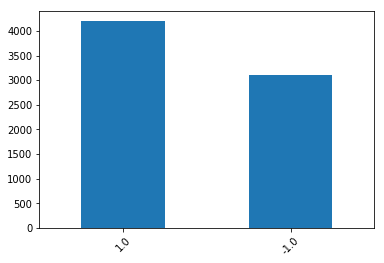

In [29]:
sentilex.polarity.value_counts().plot(kind='bar', rot=45)

In [30]:
sentilex.sort_values('valence', ascending=False).head(10)

,polarity,valence
term_str,,
black,1.0,7.763166
rich,1.0,5.850741
years,1.0,4.509384
drink,1.0,4.449280
tannins,1.0,4.341058
ripe,1.0,4.245674
dark,1.0,3.956006
vineyard,1.0,3.607507
concentrated,1.0,3.523755


In [31]:
sentilex.sort_values('valence', ascending=True).head(10)

,polarity,valence
term_str,,
flavors,-1.0,-17.443662
aromas,-1.0,-8.427726
finish,-1.0,-8.034686
sweet,-1.0,-6.366870
simple,-1.0,-5.655017
soft,-1.0,-5.295714
green,-1.0,-5.072551
light,-1.0,-4.621662
like,-1.0,-3.929372


## TESTING

$$
c_{NB} = \arg\max \log{P(c)} + \sum_{id=1}^{id_{max}} \log{P(token_{id}|c)}
$$


### Get test corpus

Note that we replace the vocabulary IDs with the old.

In [32]:
test, _ = create_tokens_and_vocab(testing, src_col='doc_content')
test['term_id'] = test.term_str.map(vocab.reset_index().set_index('term_str').term_id)
test = test.dropna()
test['term_id'] = test['term_id'].astype('int')

In [33]:
test.head()

token  term_str  term_id
doc_id sent_id token_id                             
344    0       0           Aromas    aromas     1000
               2          pumpkin   pumpkin    11028
               5             corn      corn     3464
               8            stale     stale    13237
               11        inviting  inviting     7389

### OLD: Convert corpus to BOW

In [34]:
# test_docs = test.groupby(['doc_id','term_id']).term_id.count()\
#     .unstack().apply(lambda x: x.dropna().index.astype('int').tolist(), 1)\
#     .to_frame().rename(columns={0:'bow'})
# test_docs['doc_label'] = testing.doc_label
# if params['binary_counts']:
#     # set() forces BOW to consist of only one token for each term
#     test_docs['bow'] = test_docs.bow.apply(lambda x: set(x))

### Compute logs of likelihoods 

In [35]:
loglls = np.log(likelihoods[['A','B']])

### Reduce test set to single instances of words per doc

In [36]:
T1 = test.reset_index()\
    .drop_duplicates(['doc_id','term_id'])[['doc_id','term_id','term_str']]\
    .join(loglls[['A','B']], on='term_id', how='left')\
    .set_index(['doc_id','term_id'])

In [37]:
T1.head()

term_str          A         B
doc_id term_id                               
344    1000       aromas  -4.938080 -4.160736
       11028     pumpkin -12.583478 -9.996278
       3464         corn -10.974040 -8.247078
       13237       stale -12.583478 -9.185347
       7389     inviting  -7.838546 -8.579211

### Compute POSTERIORs and make prediction

In [38]:
testing['A'] = np.exp(T1.A.unstack().sum(1) + np.log(priors.A))
testing['B'] = np.exp(T1.B.unstack().sum(1) + np.log(priors.B))
testing['prediction'] = testing[['A','B']].idxmax(1)

In [39]:
testing.head(5)

,doc_content,points,doc_label,set,A,B,prediction
doc_id,,,,,,,
344,"Aromas of pumpkin, squash and corn chips are s...",80,B,0,2.907216e-73,2.522458e-60,B
349,"RunRig is always complex, and the 2012 doesn't...",97,A,0,6.773231e-65,1.080606e-71,A
352,Citrus-kissed saltiness lies at the core of th...,96,A,0,2.356108e-89,1.441293e-102,A
354,"Whiffs of white mushroom, saffron and caramel ...",96,A,0,1.110472e-70,4.414211e-76,A
356,"Dusty, firm, powerful: just a few apt descript...",95,A,0,1.703481e-55,4.742773e-61,A


## EVALUATION

In [40]:
testing['result'] = testing.doc_label == testing.prediction
T, F = testing.result.value_counts()
grade = round(T/(T+F) * 100, 4)
CM = testing.reset_index().groupby(['prediction','doc_label']).doc_id.count().unstack().fillna(0)

In [41]:
grade

96.2417

In [42]:
CM

doc_label,A,B
prediction,,
A,2867,164
B,58,2818


### Precision

In [43]:
CM / CM.sum(1)

doc_label,A,B
prediction,,
A,0.945892,0.057024
B,0.019136,0.979833


### Recall

In [44]:
CM / CM.sum()

doc_label,A,B
prediction,,
A,0.980171,0.054997
B,0.019829,0.945003


### OLD: Compute POSTERIOR and make prediction

In [45]:
# posteriors = test_docs.bow.apply(lambda x: likelihoods.loc[x].product() * priors)
# test_docs['prediction'] = posteriors.T.idxmax()

In [46]:
# test_docs.head()

## OLD: EVALUATION 

In [47]:
# test_docs['result'] = test_docs.doc_label == test_docs.prediction
# T, F = test_docs.result.value_counts()
# grade = round(T/(T+F) * 100, 4)
# CM = test_docs.reset_index().groupby(['doc_label','prediction']).doc_id.count().unstack().fillna(0)

### OLD: Results

In [48]:
# print("______________________")
# print("      RESULTS")
# print("----------------------")
# print('Grade:', grade)
# print("----------------------")
# print("Confusion matrix:")
# print(CM)
# print("______________________")

## Predicting by Lexicon

In [49]:
test2 = test.join(sentilex, on='term_str', how='left').sort_index()

In [50]:
test2.head()

token  term_str  term_id  polarity   valence
doc_id sent_id token_id                                                 
344    0       0           Aromas    aromas     1000      -1.0 -8.427726
               2          pumpkin   pumpkin    11028      -1.0 -0.042141
               5             corn      corn     3464      -1.0 -0.244882
               8            stale     stale    13237      -1.0 -0.099103
               11        inviting  inviting     7389       1.0  0.206269

In [51]:
testing['lexpredict'] = np.sign(test2.groupby('doc_id').valence.sum())
testing.loc[testing.lexpredict > 0, 'lexpredict_label'] = 'A'
testing.loc[testing.lexpredict <= 0, 'lexpredict_label'] = 'B'

In [52]:
testing.head()

,doc_content,points,doc_label,set,A,B,prediction,result,lexpredict,lexpredict_label
doc_id,,,,,,,,,,
344,"Aromas of pumpkin, squash and corn chips are s...",80,B,0,2.907216e-73,2.522458e-60,B,True,-1.0,B
349,"RunRig is always complex, and the 2012 doesn't...",97,A,0,6.773231e-65,1.080606e-71,A,True,1.0,A
352,Citrus-kissed saltiness lies at the core of th...,96,A,0,2.356108e-89,1.441293e-102,A,True,1.0,A
354,"Whiffs of white mushroom, saffron and caramel ...",96,A,0,1.110472e-70,4.414211e-76,A,True,-1.0,B
356,"Dusty, firm, powerful: just a few apt descript...",95,A,0,1.703481e-55,4.742773e-61,A,True,1.0,A


In [53]:
testing['result2'] = testing.doc_label == testing.lexpredict_label

In [54]:
testing.result2.value_counts() / testing.result2.value_counts().sum()

True     0.776875
False    0.223125
Name: result2, dtype: float64

In [55]:
T2, F2 = testing.result2.value_counts()
grade2 = round(T2/(T2+F2) * 100, 4)
CM2 = testing.reset_index().groupby(['lexpredict_label','doc_label']).doc_id.count().unstack().fillna(0)

In [56]:
grade2

77.6875

In [57]:
CM2

doc_label,A,B
lexpredict_label,,
A,1751,144
B,1174,2838


In [58]:
testing.head()

,doc_content,points,doc_label,set,A,B,prediction,result,lexpredict,lexpredict_label,result2
doc_id,,,,,,,,,,,
344,"Aromas of pumpkin, squash and corn chips are s...",80,B,0,2.907216e-73,2.522458e-60,B,True,-1.0,B,True
349,"RunRig is always complex, and the 2012 doesn't...",97,A,0,6.773231e-65,1.080606e-71,A,True,1.0,A,True
352,Citrus-kissed saltiness lies at the core of th...,96,A,0,2.356108e-89,1.441293e-102,A,True,1.0,A,True
354,"Whiffs of white mushroom, saffron and caramel ...",96,A,0,1.110472e-70,4.414211e-76,A,True,-1.0,B,False
356,"Dusty, firm, powerful: just a few apt descript...",95,A,0,1.703481e-55,4.742773e-61,A,True,1.0,A,True
